In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
feat= pd.read_csv('feat.csv')
feat.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
feat.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [4]:
from statistics import mean

feat['CPI']=feat['CPI'].fillna(mean(feat['CPI']))
feat['Unemployment']=feat['Unemployment'].fillna(mean(feat['Unemployment']))
feat['MarkDown1']=feat['MarkDown1'].fillna(0)
feat['MarkDown2']=feat['MarkDown2'].fillna(0)
feat['MarkDown3']=feat['MarkDown3'].fillna(0)
feat['MarkDown4']=feat['MarkDown4'].fillna(0)
feat['MarkDown5']=feat['MarkDown5'].fillna(0)

In [5]:
#Merging(adding) all features with training data

In [6]:
data=pd.read_csv('train.csv')

In [7]:
new_data = pd.merge(feat, data, on=['Store','Date','IsHoliday'], how='inner')

In [8]:
new_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


In [9]:
stores=pd.read_csv('stores.csv')

In [10]:
# merging(adding) all stores info with new training data
final_data = pd.merge(new_data,stores,how='inner',on=['Store'])

In [11]:
final_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


In [12]:
# sorting data with respect to date
final_data = final_data.sort_values(by='Date')

# Exploratory Data Analysis

In [13]:
sizes=stores['Type'].value_counts()
print(sizes)

A    22
B    17
C     6
Name: Type, dtype: int64


In [14]:
sizes.values

array([22, 17,  6], dtype=int64)

NameError: name 'siz' is not defined

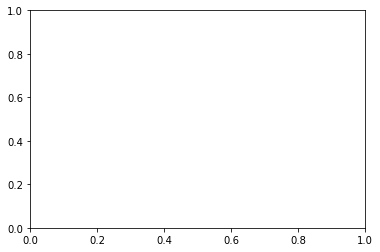

In [15]:
labels= 'A store', 'B Store', 'C store'



fig,ax1=plt.subplots()
ax1.pie(siz, labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
final_data=final_data[['Store', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown3',  'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size']]

[]

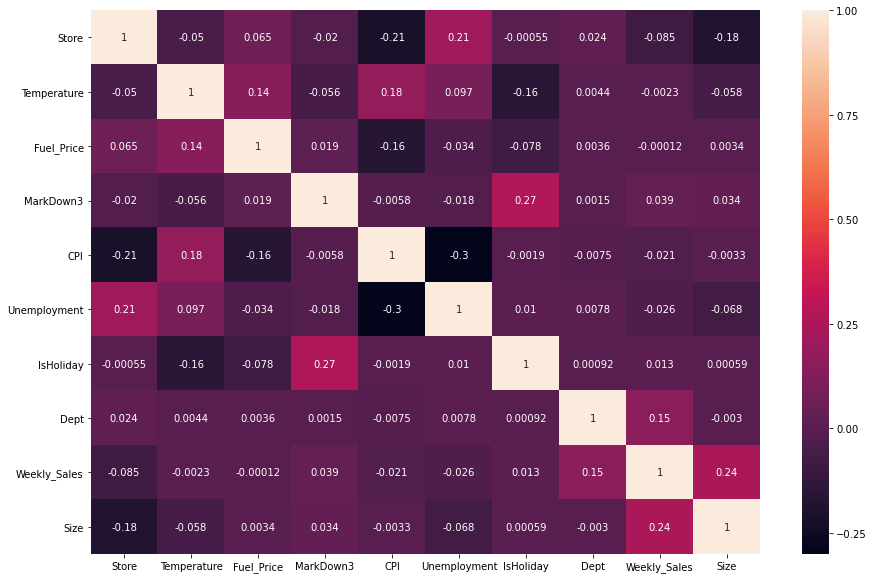

In [19]:
corr= final_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.plot()

Splitting Date into feature

In [24]:
final_data.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,3,14612.19,B,103681


In [30]:
# Add column for year
final_data["Year"]=pd.to_datetime(final_data["Date"],format="%Y-%m-%d").dt.year
# Add column for Day
final_data['Day']=pd.to_datetime(final_data['Date'],format='%Y-%m-%d').dt.day

# Add column for Days to next christmas
final_data['Days to Next Christmas']=(pd.to_datetime(final_data['Year'].astype(str)+"-12-31",format="%Y-%m-%d")-pd.to_datetime(final_data['Date'],format="%Y-%m-%d")).dt.days.astype(int)


In [62]:
final_data

,Store,Date,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day,Days to Next Christmas
0,1,2010-02-05,42.31,2.572,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
330761,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,3,14612.19,B,103681,2010,5,329
330762,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,4,26323.15,B,103681,2010,5,329
330763,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,5,36414.63,B,103681,2010,5,329
330764,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,6,11437.81,B,103681,2010,5,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,2012-10-26,46.97,3.755,150.0,131.193097,5.621,False,49,7770.71,A,219622,2012,26,66
128052,13,2012-10-26,46.97,3.755,150.0,131.193097,5.621,False,50,1486.00,A,219622,2012,26,66
128053,13,2012-10-26,46.97,3.755,150.0,131.193097,5.621,False,52,4738.93,A,219622,2012,26,66
390991,41,2012-10-26,41.80,3.686,250.6,199.219532,6.195,False,4,32699.78,A,196321,2012,26,66


In [32]:
# Splitting Store type into categorical feature

In [63]:
X=final_data.copy()
X

,Store,Date,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Day,Days to Next Christmas
0,1,2010-02-05,42.31,2.572,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,5,329
330761,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,3,14612.19,B,103681,2010,5,329
330762,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,4,26323.15,B,103681,2010,5,329
330763,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,5,36414.63,B,103681,2010,5,329
330764,35,2010-02-05,27.19,2.784,0.0,135.352461,9.262,False,6,11437.81,B,103681,2010,5,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,2012-10-26,46.97,3.755,150.0,131.193097,5.621,False,49,7770.71,A,219622,2012,26,66
128052,13,2012-10-26,46.97,3.755,150.0,131.193097,5.621,False,50,1486.00,A,219622,2012,26,66
128053,13,2012-10-26,46.97,3.755,150.0,131.193097,5.621,False,52,4738.93,A,219622,2012,26,66
390991,41,2012-10-26,41.80,3.686,250.6,199.219532,6.195,False,4,32699.78,A,196321,2012,26,66


In [65]:
y=X[['Weekly_Sales']]
y

,Weekly_Sales
0,24924.50
330761,14612.19
330762,26323.15
330763,36414.63
330764,11437.81
...,...
128051,7770.71
128052,1486.00
128053,4738.93
390991,32699.78


In [66]:
tp=pd.get_dummies(X.Type)
X=pd.concat([X,tp],axis=1)
X=X.drop(columns='Type')


In [67]:
X.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown3', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Size', 'Year',
       'Day', 'Days to Next Christmas', 'A', 'B', 'C'],
      dtype='object')

In [68]:
X=X[['Store', 'Temperature', 'Fuel_Price', 'MarkDown3', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Size', 'Year',
       'Day', 'Days to Next Christmas', 'A', 'B', 'C']]
X.head()

,Store,Temperature,Fuel_Price,MarkDown3,CPI,Unemployment,IsHoliday,Dept,Size,Year,Day,Days to Next Christmas,A,B,C
0,1,42.31,2.572,0.0,211.096358,8.106,False,1,151315,2010,5,329,1,0,0
330761,35,27.19,2.784,0.0,135.352461,9.262,False,3,103681,2010,5,329,0,1,0
330762,35,27.19,2.784,0.0,135.352461,9.262,False,4,103681,2010,5,329,0,1,0
330763,35,27.19,2.784,0.0,135.352461,9.262,False,5,103681,2010,5,329,0,1,0
330764,35,27.19,2.784,0.0,135.352461,9.262,False,6,103681,2010,5,329,0,1,0


In [69]:
X.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown3', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Size', 'Year', 'Day',
       'Days to Next Christmas', 'A', 'B', 'C'],
      dtype='object')

Building train-test set

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
#train-test split
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

In [74]:
print('X train shape :', X_train.shape)
print('X test shape :', X_test.shape)
print('Y train shape :', y_train.shape)
print('y test shape :', y_test.shape)

X train shape : (337256, 15)
X test shape : (84314, 15)
Y train shape : (337256, 1)
y test shape : (84314, 1)


# Machine Learning Models

We are going to use different models to test the accuracy and will finally train the whole data to check the score against kaggle competition.
Standardizing train and test data :

In [75]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


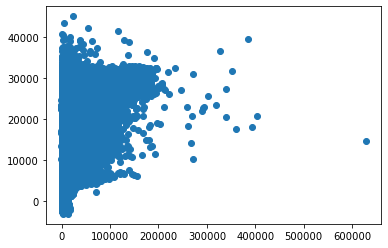

In [117]:
plt.scatter(y_test,y_pred)
plt.show()

In [118]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print('RMSE:',(mean_squared_error(y_test,y_pred))**.5)
accuracy=dt.score(X_test,y_test)
print('accuracy LinearRegressor(%):',accuracy)

14564.480300970801
473481688.7779033
RMSE: 21759.634389803137
accuracy LinearRegressor(%): 0.9639783376761165


# 1) KNN Regressor

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(n_neighbors=10, n_jobs=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

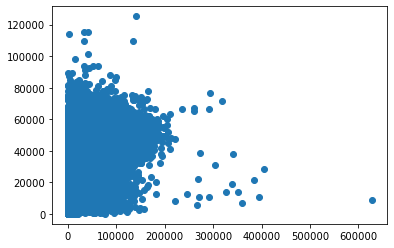

In [83]:
plt.scatter(y_test,y_pred)
plt.show()

In [84]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
accuracy=knn.score(X_test,y_test)

12460.256832507055
415569671.79319936
20385.526036705538


# 2 ) Decision tree Regessor

In [86]:
from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [97]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print('RMSE:',(mean_squared_error(y_test,y_pred))**.5)
accuracy=dt.score(X_test,y_test)
print('accuracy DTR(%):',accuracy)


1723.6681188177529
18734619.006099995
RMSE: 4328.35061034801
accuracy DTR(%): 0.9639783376761165


# 3) Random Forest Regressor

In [99]:
# After Hyper-parameter tunning
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators=400,max_depth=15, n_jobs=5)
rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


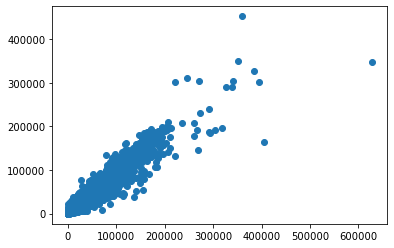

In [101]:
plt.scatter(y_test,y_pred)
plt.show()

In [100]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print('RMSE:',(mean_squared_error(y_test,y_pred))**.5)
accuracy=dt.score(X_test,y_test)
print('accuracy RFRegressor(%):',accuracy)

1881.089215390937
17938052.912731826
RMSE: 4235.333860834566
accuracy RFRegressor(%): 0.9639783376761165


# 4) XGBRegressor

In [103]:
import xgboost as xgb

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [105]:
xgb_clf=xgb.XGBRegressor(objective='reg:linear',nthread=4, n_estimators=500, max_depth=6, learning_rate=0.5)
xb= xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

[13:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


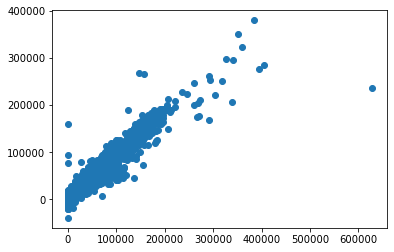

In [106]:
plt.scatter(y_test, y_pred)
plt.show()

In [107]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print('RMSE:',(mean_squared_error(y_test,y_pred))**.5)
accuracy=dt.score(X_test,y_test)
print('accuracy XGBRegressor(%):',accuracy)

1899.3429614932827
14471768.438454956
RMSE: 3804.177761153513
accuracy XGBRegressor(%): 0.9639783376761165


# 4) ExtraTreesRegressor

In [108]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


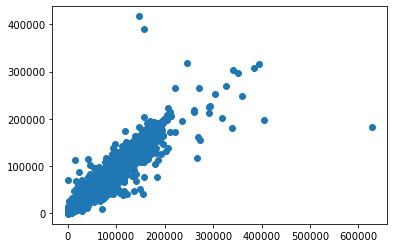

In [109]:
plt.scatter(y_test,y_pred)
plt.show()

In [110]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print('RMSE:',(mean_squared_error(y_test,y_pred))**.5)
accuracy=dt.score(X_test,y_test)
print('accuracy eXTreeBRegressor(%):',accuracy)

1384.8978520174587
16629818.482056577
RMSE: 4077.967444948105
accuracy eXTreeBRegressor(%): 0.9639783376761165


# All model Comparison

In [114]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model","MAE","RMSE","Accuracy"]

x.add_row(["Linear Regression (Baseline)", 14566, 21767, 8.89])
x.add_row(["KNNRegressor", 8769, 14991, 56.87])
x.add_row(["DecisionTreeRegressor", 2375, 7490, 96.02])
x.add_row(["RandomForestRegressor", 1854, 5785, 96.56])
x.add_row(["ExtraTreeRegressor", 1887, 5684, 96.42])
x.add_row(["XGBRegressor", 2291, 5205,97.23 ])
print(x)

+------------------------------+-------+-------+----------+
|            Model             |  MAE  |  RMSE | Accuracy |
+------------------------------+-------+-------+----------+
| Linear Regression (Baseline) | 14566 | 21767 |   8.89   |
|         KNNRegressor         |  8769 | 14991 |  56.87   |
|    DecisionTreeRegressor     |  2375 |  7490 |  96.02   |
|    RandomForestRegressor     |  1854 |  5785 |  96.56   |
|      ExtraTreeRegressor      |  1887 |  5684 |  96.42   |
|         XGBRegressor         |  2291 |  5205 |  97.23   |
+------------------------------+-------+-------+----------+


In [113]:
x